In [61]:
#imports
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
#If we want a training set we will need to convert some non-numeric values to numbers, our training dataframe 
#will be tt_df for titanic
#training dataframe
tt_df = pd.read_csv('train.csv')
tt_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [63]:
#Dont need these columns
tt_df.drop(['Ticket','Cabin'], axis=1, inplace=1)

In [64]:
#lets convert the genders to 1 and 0, 1 for men, 0 for women
tt_df.loc[tt_df['Sex'] == 'male', 'Sex'] = 1
tt_df.loc[tt_df["Sex"] == 'female','Sex'] = 0

In [65]:
#there are two people for whom 'embarked' is not know but we can just assume its 'S' since that is the vast majority
tt_df['Embarked'].fillna('S', inplace=True)
tt_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [66]:
#We want to make the embarked values to numbers
embarked = {'S':0,'C':1,'Q':2}
tt_df['Embarked']=tt_df['Embarked'].map(embarked)

In [67]:
#We also need to fill in the missing age values with something reasonable
tt_df['Age'] = tt_df['Age'].interpolate()

In [68]:
#import the linear regression class
from sklearn.linear_model import LinearRegression
#import the cross validation class
from sklearn.cross_validation import KFold
from __future__ import division

In [69]:
#Our attribute columns we want to use for training the model
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [70]:
#linear regression model
lreg = LinearRegression()
#Generate cross validation folds for our dataset, set random state to true to ensure same size folds
kF = KFold(tt_df.shape[0], n_folds=3, random_state=True)

In [71]:
#create array of predictions
predictions =[]
for train, test in kF:
    #The predictors for the model only come from the training folds
    train_predictors = (tt_df[predictors].iloc[train,:])
    #Set the target
    train_target = tt_df['Survived'].iloc[train]
    #Train the algorithm
    lreg.fit(train_predictors, train_target)
    #Now we can make some predictions
    test_predictions = lreg.predict(tt_df[predictors].iloc[test,:])
    #Save our array of test predictions
    predictions.append(test_predictions)

In [72]:
#Lets see how accurate our predictions are, we need to find our error rate
predictions = np.concatenate(predictions, axis=0)

#We will say probabilty at or below 0.5 is not surviving, above 0.5 is survivor
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
#Find the accuracy
accuracy = sum(predictions[predictions == tt_df['Survived']]) / len(predictions)

C:\Users\Adam\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [73]:
print 'The accuracy is {:.2f}.'.format(accuracy)

The accuracy is 0.79.


In [74]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

In [75]:
#set our logistic algorithm
logreg = LogisticRegression(random_state=1)
#Compute our accuracy for all the cross-validation folds
logreg_acc = cross_validation.cross_val_score(logreg, tt_df[predictors], tt_df['Survived'], cv=3)
print 'The accuracy of logistic regression with 3 folds is {:.2f}'.format(logreg_acc.mean())

The accuracy of logistic regression with 3 folds is 0.79


In [76]:
#Now we need to load in the test set of data
tt_test_df = pd.read_csv('test.csv')
tt_test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [77]:
#We need to perform the same manipulations on this data that we did to the test set
#fill in the missing age values by interpolating
tt_test_df['Age'] = tt_test_df['Age'].interpolate()
tt_test_df['Embarked'].fillna('S', inplace=True)
tt_test_df['Embarked']=tt_test_df['Embarked'].map(embarked)
tt_test_df.drop(['Ticket'], axis=1, inplace=True)
gender = {'male':1, 'female':0}
tt_test_df['Sex']=tt_test_df['Sex'].map(gender)

In [78]:
#we have a nan fare value we need to fill in
tt_test_df['Fare'].fillna(tt_test_df["Fare"].mean(), inplace=True)
tt_test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NaN,2


In [79]:
#Make our test predictions
#Fit the Logistic Regression Algorithm
logreg.fit(tt_df[predictors], tt_df['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
predictions = logreg.predict(tt_test_df[predictors])

In [81]:
#Create a submission file
submission = pd.DataFrame({'PassengerId':tt_test_df['PassengerId'], 'Survived':predictions})

In [82]:
submission.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [83]:
#Save the submission file
#submission.to_csv('kaggle.csv',index=False)

In [84]:
#now lets use random forests
from sklearn.ensemble import RandomForestClassifier 

In [85]:
# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends 
#(the bottom points of the tree)
ranTree = RandomForestClassifier(random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2)

In [86]:
#compute the accuracy score with cross validation
rt_acc = cross_validation.cross_val_score(ranTree, tt_df[predictors], tt_df['Survived'], cv=3)
print 'The average accuracy is {:.3f}'.format(rt_acc.mean())

The average accuracy is 0.826


In [87]:
#lets try adding some new features to possible increase accuracy from known data
#We can add family size from Parch + SibSP
tt_df['FamilySize'] = tt_df['SibSp'] + tt_df['Parch']
#We can add the length of a name, some of the names have others associated though so this may need to be fixed
tt_df['NameLength'] = tt_df['Name'].apply(lambda x: len(x))

In [ ]:
#Lets add our family IDs
import operator

In [ ]:
#Function to get the the id given a row
def get_family_id(row):
    #Find the last name by splitting on the comma
    last_name = row['Name'].split(',')[0]
    #Create a family id
    family_id = '{0}{1}'.format(last_name, row['FamilySize'])
    #Look up the id in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            #Get the maximum id from the mapping and add one to it if we dont have an id
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] +1)
        family_id_mapping[family_id]=current_id
    return family_id_mapping[family_id]

In [166]:
#Get the family ids with the apply method
family_ids = tt_df.apply(get_family_id, axis=1)

In [167]:
#There a re a lot of families under 3 members sp we will compress all of them to one code
family_ids[tt_df['FamilySize'] < 3] = -1

In [168]:
tt_df['FamID']=family_ids

In [94]:
#Map the IDs to the family name by merging the two dataframes
tt_df = tt_df.merge(famName_df, on=['FamName'])

In [169]:
tt_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,NameLength,FamName,FamID,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,0,1,23,Braund,-1,1
1,478,0,3,"Braund, Mr. Lewis Richard",1,29,1,0,7.0458,0,1,25,Braund,-1,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,1,1,51,Cumings,-1,3


In [96]:
#import regular expression
import re

In [97]:
#Another value we could extract is a person title
def get_title(name):
    #We need to used regular expression to extract the title
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    else:
        return ""
#Get all the titles and print out how often each occurs
titles = tt_df['Name'].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64


In [98]:
#We need to map these titles to integers, many of them are rare and can be compressed based on simantics
title_mapping ={'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Dr':5, 'Rev':6, 'Rev':6, 'Col':7, 'Major':7, 'Mlle':8, 
                'Countess':10, 'Ms':2,'Lady':10, 'Jonkheer':10, 'Don':9, 'Mme':8, 'Capt':7, 'Sir':9}

In [99]:
for k, v in title_mapping.items():
    titles[titles == k] = v

In [100]:
#Make sure that it worked and everything is converted
print(pd.value_counts(titles))

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [101]:
tt_df['Title'] = titles
tt_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,NameLength,FamName,FamID,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,0,1,23,Braund,174,1
1,478,0,3,"Braund, Mr. Lewis Richard",1,29,1,0,7.0458,0,1,25,Braund,174,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,1,1,51,Cumings,360,3
3,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,0,0,22,Heikkinen,146,2
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,0,1,44,Futrelle,145,3


In [102]:
#We want to find the best features to use as predictors so we will use SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

In [103]:
#remake out total list of predictors
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','FamID', 'Title']

In [104]:
#Perform feature selection, find the best 5
selector = SelectKBest(f_classif, k=5)
selector.fit(tt_df[predictors], tt_df["Survived"])

SelectKBest(k=5, score_func=<function f_classif at 0x000000001C66A588>)

In [105]:
#get the raw p-values for each feature and transform the p-values into scores
scores = -np.log10(selector.pvalues_)

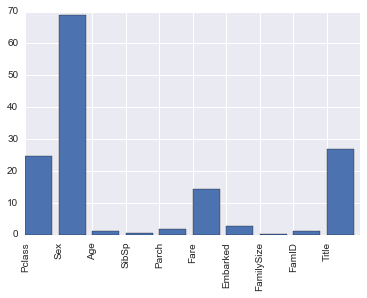

In [106]:
#Plot out each of the scores
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)),predictors, rotation='vertical')
plt.show()

In [120]:
#lets just pick our best predictors
predictors = ['Pclass','Sex','Fare','Title']

In [131]:
#Looks like our best indicators are Sex, then Pclass, then fare, and embarked, lets use them in a random forest
rfc = RandomForestClassifier(random_state=1, n_estimators=250, min_samples_split=8, min_samples_leaf=4)

In [132]:
#Find the accuracy score for cross validation folds
scores = cross_validation.cross_val_score(rfc, tt_df[predictors], tt_df['Survived'], cv=10)

In [133]:
print 'The average accuracy score is {:.3f}'.format(scores.mean())

The average accuracy score is 0.825


In [135]:
#Now we are going to try an ensemble using gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
#We are going to combine two algorithms, a Gradient Boosting Classifier and Logistic Regression
#We want to limit to linear predcitors for the linear regression but anything can go for the gradient boosting classifier
algorithms = [[GradientBoostingClassifier(random_state=1, n_estimators=250, max_depth=4), ['Pclass','Sex','Age',
                                                                            'Fare','Embarked','FamilySize','FamID','Title']], 
             [LogisticRegression(random_state=1), ['Pclass','Sex','Fare','FamilySize','Age','Embarked','Title']]]

In [148]:
#Initialize the cross validation folds
kf = KFold(tt_df.shape[0], n_folds=10, random_state=1)

In [149]:
#someplace to store our predictions
predictions=[]
for train, test in kf:
    train_target = tt_df['Survived'].iloc[train]
    full_test_predictions = []
    #Make predictions for each algorithm for each fold
    for alg, predictors in algorithms:
        #Fit the algorithms to the training data
        alg.fit(tt_df[predictors].iloc[train,:],train_target)
        #select and predict on the test fold
        #The .astype(float) is necessary to convert the dataframe to all floats and avoid sklearn error
        test_predictions = alg.predict_proba(tt_df[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    #Use a simple ensemble scheme -- just average the two predictions to get the final classifications
    test_predictions = (full_test_predictions[0] + full_test_predictions[1])/2
    #Any value over 0.5 is assumed to be a 1, and below 0.5 a 0 prediction
    test_predictions[test_predictions <= 0.5] = 0
    test_predictions[test_predictions > 0.5] = 1
    predictions.append(test_predictions)
    
#put all the predictions together into one array
predictions = np.concatenate(predictions, axis=0)

In [150]:
#We need to find out how accurate the overall equation is on the test data
#Adding the predictions to the survived column will give is 0, 1, or 2, and place we get a 1 is a 'miss'
x = predictions + tt_df['Survived']
x.value_counts()

0    488
2    250
1    153
Name: Survived, dtype: int64

In [151]:
#Subtract the precent of misses from the total number to find the accuracy
accuracy = 1-(len(x[x==1]) / len(x))
print 'The accuracy now is {:.3f}'.format(accuracy)

The accuracy now is 0.828


In [152]:
#This is a tad better than the results we had earlier
#Now lets load up our test data set
test_df = pd.read_csv('test.csv')

In [153]:
#We need to do all the same manipulation so first lets do the titles
titles = test_df['Name'].apply(get_title)
pd.value_counts(titles)

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Name, dtype: int64

In [154]:
#We need to add this new Dona title
title_mapping ={'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Dr':5, 'Rev':6, 'Rev':6, 'Col':7, 'Major':7, 'Mlle':8, 
                'Countess':10, 'Ms':2,'Lady':10, 'Jonkheer':10, 'Don':9, 'Mme':8, 'Capt':7, 'Sir':9, 'Dona':10}

In [155]:
#Map the values to the keys
for k,v in title_mapping.items():
    titles[titles == k] = v

In [158]:
#Add the titles column in and make sure it looks good
test_df['Title'] = titles
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1


In [159]:
#Check the number of results, they match from above
test_df['Title'].value_counts()

1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Title, dtype: int64

In [160]:
#Add the family size
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

In [162]:
#A (new) dictionary mapping family name to id
family_id_mapping={}

In [176]:
#Use the same family values as the test data
family_ids = test_df.apply(get_family_id, axis =1)

In [177]:
#There are a lot of family ids, so we will compress all of the families under 3 members into one code
family_ids[test_df['FamilySize'] < 3]= -1

In [187]:
#Add the Family id column to dataframe
test_df['FamID'] = family_ids
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyId,NameLength,FamID
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,-1,16,-1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3,1,-1,32,-1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,-1,25,-1


In [181]:
#Add the namelength column
test_df['NameLength'] = test_df['Name'].apply(lambda x: len(x))

In [209]:
#Make sure the embarked is all filled
test_df['Embarked'].fillna('S', inplace=True)
embarked = {'S':0,'C':1,'Q':2}
test_df['Embarked']=test_df['Embarked'].map(embarked)
test_df['Age'] = test_df['Age'].interpolate()
#Somebody is missing a fare, they are 3rd class so we will just give them the average fare
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [210]:
#lets convert the genders to 1 and 0, 1 for men, 0 for women
test_df.loc[test_df['Sex'] == 'male', 'Sex'] = 1
test_df.loc[test_df["Sex"] == 'female','Sex'] = 0

In [212]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyId,NameLength,FamID
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0,1,0,-1,16,-1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,3,1,-1,32,-1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0,1,0,-1,25,-1


In [213]:
#set up pur predictors again
predictors = ['Pclass','Sex','Age','Fare','Embarked','FamilySize','Title','FamID']

#We are going to combine two algorithms, a Gradient Boosting Classifier and Logistic Regression
#We want to limit to linear predcitors for the linear regression but anything can go for the gradient boosting classifier
algorithms = [[GradientBoostingClassifier(random_state=1, n_estimators=250, max_depth=4), predictors], 
             [LogisticRegression(random_state=1), ['Pclass','Sex','Fare','FamilySize','Age','Embarked','Title']]]

In [214]:
full_predictions=[]
for alg, predictors in algorithms:
    #Fit the algorithm to the full training data.
    alg.fit(tt_df[predictors], tt_df['Survived'])
    #Predict using the test dataset. we have to convert all the columns to floats to avoid errors
    predictions = alg.predict_proba(test_df[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

In [215]:
#The gradient boosting classifier generates better predictions, so we weight it higher
predictions = (full_predictions[0]*3 + full_predictions[1])/4
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
predictions = predictions.astype(int)

In [216]:
submission = DataFrame({'PassengerId':test_df['PassengerId'],
                          'Survived':predictions})

In [217]:
submission.to_csv('kaggle.csv', index=False)